In [1]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R

# Switch values if necessary 1 11 2021
Dist_prism_12 = 1.0398341231585624*1000
Dist_prism_13 = 0.818424700118086*1000
Dist_prism_23 = 0.8806156053859284*1000
Dist_GPS_12 = 0.835637436093363*1000
Dist_GPS_13 = 0.7812173648662254*1000
Dist_GPS_23 = 0.5166745729506486*1000

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


<IPython.core.display.Javascript object>


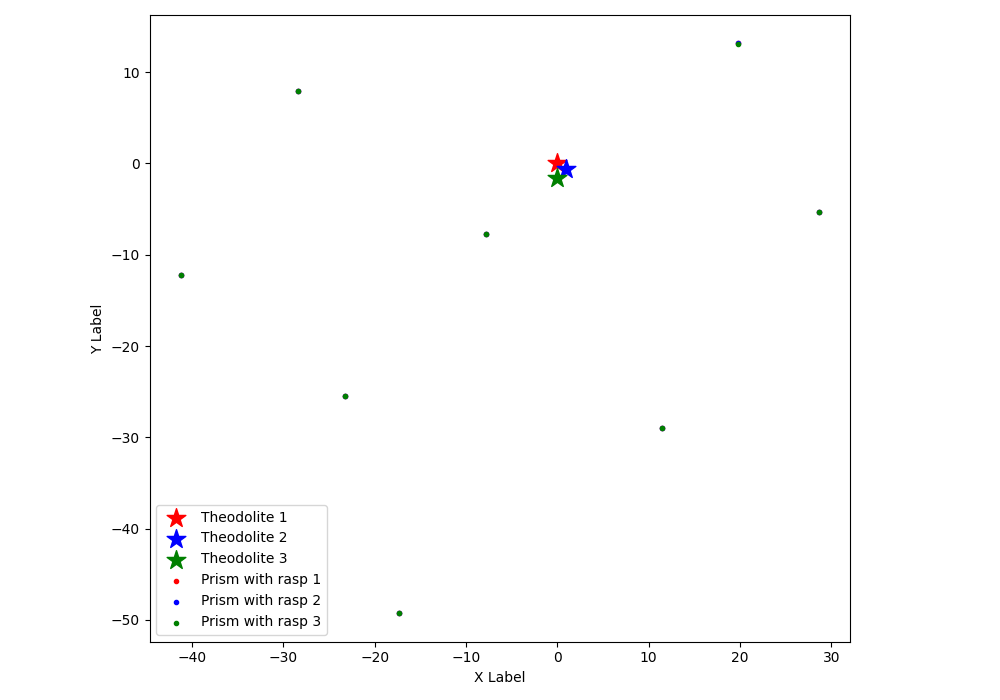

In [25]:
%matplotlib notebook
# Read markers file of grand axe and show them
tfu = importlib.reload(tfu)
file_name = '/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_theodolite_reference_prisms.txt'
trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)
tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, 0, 0,"example.pdf",1)

Number of data for theodolites: [1174 1061 1156]
Bad measures: 752


<IPython.core.display.Javascript object>


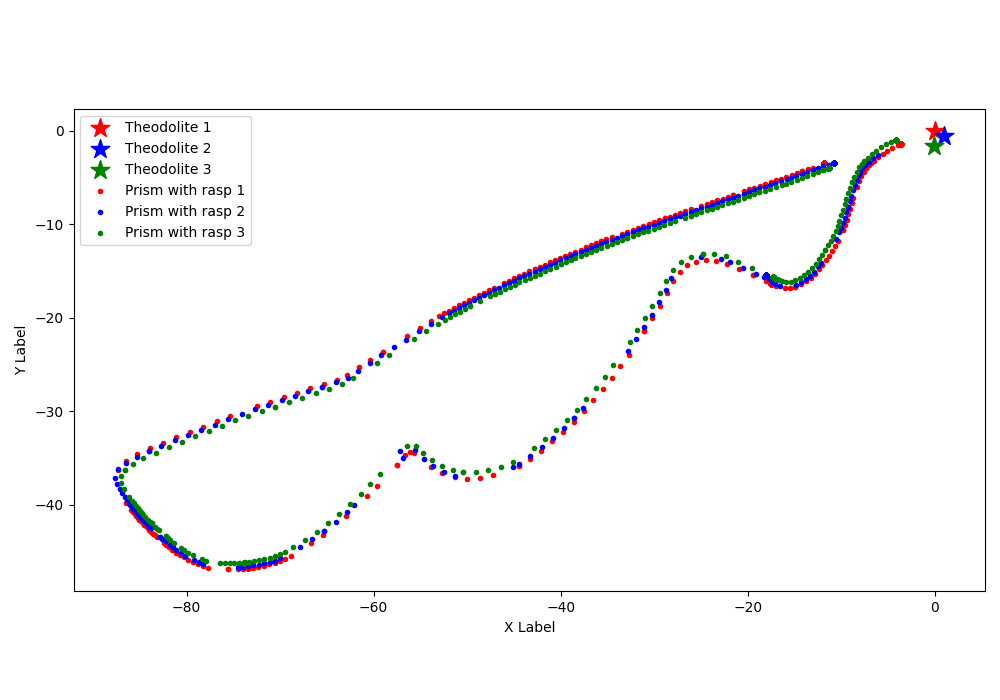

In [29]:
# Read rosbag of grand axe and show the trajectory
tfu = importlib.reload(tfu)
# small loop 1
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-15-05-36_filtered.bag"
# small loop 2
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-15-13-53_filtered.bag"
# long bag
#file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-15-20-59_filtered.bag"
# short bag end
file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021-11-16-16-15-00_filtered.bag"

Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3 = tfu.read_rosbag_theodolite_with_tf(file, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T

%matplotlib notebook
# Variable to plot in 3d, 0 = 2D, 1 = 3D
plot_3d = 0
# Variable to save file in pdf
save_pdf = 0
# file name to save plot in pdf
file_pdf = "./figs/grand_axe_4.pdf"

tfu.plot_trajectories_prism(3, trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand, plot_3d, save_pdf, file_pdf, 1)

In [19]:
# Read GPS data and compute the inter-distance between them (long !)
tfu = importlib.reload(tfu)
import scripts.theodolite_utils as ttfu
ttfu = importlib.reload(ttfu)

name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_gps_data/Vlad_files/front_raw_202111162046.pos"
GPS_front_raw_data = ttfu.read_gps_file(name_file, 9)
name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_gps_data/Vlad_files/back_raw_202111161917.pos"
GPS_back_raw_data = ttfu.read_gps_file(name_file, 9)
name_file = "/media/norlab/Samsung_disk/Data/IROS_2022/Total_station/2021_11_16_gps_data/Vlad_files/middle_raw_202111162046.pos"
GPS_middle_raw_data = ttfu.read_gps_file(name_file, 9)

limit_data_front = np.array([0,1000000,0])
limit_data_back = np.array([0,1000000,0])
limit_data_middle = np.array([0,1000000,0])
GPS_front_utm_data = ttfu.utm_gps_data(GPS_front_raw_data, limit_data_front, False)
GPS_back_utm_data = ttfu.utm_gps_data(GPS_back_raw_data, limit_data_back, False)
GPS_middle_utm_data = ttfu.utm_gps_data(GPS_middle_raw_data, limit_data_middle, False)
print("Done UTM data !")

time_gps_fb, distance_gps_fb = tfu.distance_between_gps(GPS_back_utm_data, GPS_front_utm_data)
time_gps_fm, distance_gps_fm = tfu.distance_between_gps(GPS_middle_utm_data,GPS_front_utm_data)
time_gps_mb, distance_gps_mb = tfu.distance_between_gps(GPS_back_utm_data,GPS_middle_utm_data)

Average satellite number: 13.9 , Std:  1.5 , Min : 8.0 , Max : 17.0
Average satellite number: 14.8 , Std:  0.8 , Min : 5.0 , Max : 17.0
Average satellite number: 14.7 , Std:  1.0 , Min : 9.0 , Max : 17.0
Done UTM data !
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
153
1
154
1
155
1
156
1
157
1
158
1
159
1
160
1
161
1
162
1
163
1
164
1
165
1
166
1
167
1
168
1
169
1
170
1
171
1
172
1
173
1
174
1
175
1
176
1
177
1
178
1
179
1
180
1
181
1
182
1
183
1
184
1
185
1
186
1
187
1
188
1
189
1
190
1
191
1
192
1
193
1
194
1
195
1
196
1
197
1
198
1
199
1
200
1
201
1
202
1
203
1
204
1
205
1
206
1
207
1
208
1
209
1
210
1
211
1
212
1
213
1
214
1
215
1
216
1
217
1
218
1
219
1
220
1
221
1
222
1
223
1
224
1
225
1
226
1
227
1
228
1
229
1
230
1
231
1
232
1
233
1
234
1
235
1
236
1
237
1
238
1
239
1
240
1
241
1
242
1
243
1
244
1
245
1
246
1
247
1
248
1
249
1
250
1
251
1
252
1
253
1
254
1
255
1
256
1
257
1
258
1
259
1
260
1
261
1
262
1
263
1
264
1
265
1
266
1
267
1
268
1
269
1
270
1
271
1
272
1
273
1
274
1
275
1
276
1
277
1
278
1
279
1
280
1
281
1
282
1
283
1
284
1
285
1
286
1
287
1
288
1
289
1
290
1
291
1
292
1
293
1
294
1
295
1
296
1
297
1
298
1
299
1
300
1
301
1
302
1
303
1
304
1
305
1
306
1
307
1
308
1
309
1
310
1
311
1
312
1
313
1
314
1
315
1
316
1
317
1
318
1
31

1
1445
1
1446
1
1447
1
1448
1
1449
1
1450
1
1451
1
1452
1
1453
1
1454
1
1455
1
1456
1
1457
1
1458
1
1459
1
1460
1
1461
1
1462
1
1463
1
1464
1
1465
1
1466
1
1467
1
1468
1
1469
1
1470
1
1471
1
1472
1
1473
1
1474
1
1475
1
1476
1
1477
1
1478
1
1479
1
1480
1
1481
1
1482
1
1483
1
1484
1
1485
1
1486
1
1487
1
1488
1
1489
1
1490
1
1491
1
1492
1
1493
1
1494
1
1495
1
1496
1
1497
1
1498
1
1499
1
1500
1
1501
1
1502
1
1503
1
1504
1
1505
1
1506
1
1507
1
1508
1
1509
1
1510
1
1511
1
1512
1
1513
1
1514
1
1515
1
1516
1
1517
1
1518
1
1519
1
1520
1
1521
1
1522
1
1523
1
1524
1
1525
1
1526
1
1527
1
1528
1
1529
1
1530
1
1531
1
1532
1
1533
1
1534
1
1535
1
1536
1
1537
1
1538
1
1539
1
1540
1
1541
1
1542
1
1543
1
1544
1
1545
1
1546
1
1547
1
1548
1
1549
1
1550
1
1551
1
1552
1
1553
1
1554
1
1555
1
1556
1
1557
1
1558
1
1559
1
1560
1
1561
1
1562
1
1563
1
1564
1
1565
1
1566
1
1567
1
1568
1
1569
1
1570
1
1571
1
1572
1
1573
1
1574
1
1575
1
1576
1
1577
1
1578
1
1579
1
1580
1
1581
1
1582
1
1583
1
1584
1
1585
1
1586
1
1587

1
2617
1
2618
1
2619
1
2620
1
2621
1
2622
1
2623
1
2624
1
2625
1
2626
1
2627
1
2628
1
2629
1
2630
1
2631
1
2632
1
2633
1
2634
1
2635
1
2636
1
2637
1
2638
1
2639
1
2640
1
2641
1
2642
1
2643
1
2644
1
2645
1
2646
1
2647
1
2648
1
2649
1
2650
1
2651
1
2652
1
2653
1
2654
1
2655
1
2656
1
2657
1
2658
1
2659
1
2660
1
2661
1
2662
1
2663
1
2664
1
2665
1
2666
1
2667
1
2668
1
2669
1
2670
1
2671
1
2672
1
2673
1
2674
1
2675
1
2676
1
2677
1
2678
1
2679
1
2680
1
2681
1
2682
1
2683
1
2684
1
2685
1
2686
1
2687
1
2688
1
2689
1
2690
1
2691
1
2692
1
2693
1
2694
1
2695
1
2696
1
2697
1
2698
1
2699
1
2700
1
2701
1
2702
1
2703
1
2704
1
2705
1
2706
1
2707
1
2708
1
2709
1
2710
1
2711
1
2712
1
2713
1
2714
1
2715
1
2716
1
2717
1
2718
1
2719
1
2720
1
2721
1
2722
1
2723
1
2724
1
2725
1
2726
1
2727
1
2728
1
2729
1
2730
1
2731
1
2732
1
2733
1
2734
1
2735
1
2736
1
2737
1
2738
1
2739
1
2740
1
2741
1
2742
1
2743
1
2744
1
2745
1
2746
1
2747
1
2748
1
2749
1
2750
1
2751
1
2752
1
2753
1
2754
1
2755
1
2756
1
2757
1
2758
1
2759

1
3789
1
3790
1
3791
1
3792
1
3793
1
3794
1
3795
1
3796
1
3797
1
3798
1
3799
1
3800
1
3801
1
3802
1
3803
1
3804
1
3805
1
3806
1
3807
1
3808
1
3809
1
3810
1
3811
1
3812
1
3813
1
3814
1
3815
1
3816
1
3817
1
3818
1
3819
1
3820
1
3821
1
3822
1
3823
1
3824
1
3825
1
3826
1
3827
1
3828
1
3829
1
3830
1
3831
1
3832
1
3833
1
3834
1
3835
1
3836
1
3837
1
3838
1
3839
1
3840
1
3841
1
3842
1
3843
1
3844
1
3845
1
3846
1
3847
1
3848
1
3849
1
3850
1
3851
1
3852
1
3853
1
3854
1
3855
1
3856
1
3857
1
3858
1
3859
1
3860
1
3861
1
3862
1
3863
1
3864
1
3865
1
3866
1
3867
1
3868
1
3869
1
3870
1
3871
1
3872
1
3873
1
3874
1
3875
1
3876
1
3877
1
3878
1
3879
1
3880
1
3881
1
3882
1
3883
1
3884
1
3885
1
3886
1
3887
1
3888
1
3889
1
3890
1
3891
1
3892
1
3893
1
3894
1
3895
1
3896
1
3897
1
3898
1
3899
1
3900
1
3901
1
3902
1
3903
1
3904
1
3905
1
3906
1
3907
1
3908
1
3909
1
3910
1
3911
1
3912
1
3913
1
3914
1
3915
1
3916
1
3917
1
3918
1
3919
1
3920
1
3921
1
3922
1
3923
1
3924
1
3925
1
3926
1
3927
1
3928
1
3929
1
3930
1
3931

1
4961
1
4962
1
4963
1
4964
1
4965
1
4966
1
4967
1
4968
1
4969
1
4970
1
4971
1
4972
1
4973
1
4974
1
4975
1
4976
1
4977
1
4978
1
4979
1
4980
1
4981
1
4982
1
4983
1
4984
1
4985
1
4986
1
4987
1
4988
1
4989
1
4990
1
4991
1
4992
1
4993
1
4994
1
4995
1
4996
1
4997
1
4998
1
4999
1
5000
1
5001
1
5002
1
5003
1
5004
1
5005
1
5006
1
5007
1
5008
1
5009
1
5010
1
5011
1
5012
1
5013
1
5014
1
5015
1
5016
1
5017
1
5018
1
5019
1
5020
1
5021
1
5022
1
5023
1
5024
1
5025
1
5026
1
5027
1
5028
1
5029
1
5030
1
5031
1
5032
1
5033
1
5034
1
5035
1
5036
1
5037
1
5038
1
5039
1
5040
1
5041
1
5042
1
5043
1
5044
1
5045
1
5046
1
5047
1
5048
1
5049
1
5050
1
5051
1
5052
1
5053
1
5054
1
5055
1
5056
1
5057
1
5058
1
5059
1
5060
1
5061
1
5062
1
5063
1
5064
1
5065
1
5066
1
5067
1
5068
1
5069
1
5070
1
5071
1
5072
1
5073
1
5074
1
5075
1
5076
1
5077
1
5078
1
5079
1
5080
1
5081
1
5082
1
5083
1
5084
1
5085
1
5086
1
5087
1
5088
1
5089
1
5090
1
5091
1
5092
1
5093
1
5094
1
5095
1
5096
1
5097
1
5098
1
5099
1
5100
1
5101
1
5102
1
5103

1
6133
1
6134
1
6135
1
6136
1
6137
1
6138
1
6139
1
6140
1
6141
1
6142
1
6143
1
6144
1
6145
1
6146
1
6147
1
6148
1
6149
1
6150
1
6151
1
6152
1
6153
1
6154
1
6155
1
6156
1
6157
1
6158
1
6159
1
6160
1
6161
1
6162
1
6163
1
6164
1
6165
1
6166
1
6167
1
6168
1
6169
1
6170
1
6171
1
6172
1
6173
1
6174
1
6175
1
6176
1
6177
1
6178
1
6179
1
6180
1
6181
1
6182
1
6183
1
6184
1
6185
1
6186
1
6187
1
6188
1
6189
1
6190
1
6191
1
6192
1
6193
1
6194
1
6195
1
6196
1
6197
1
6198
1
6199
1
6200
1
6201
1
6202
1
6203
1
6204
1
6205
1
6206
1
6207
1
6208
1
6209
1
6210
1
6211
1
6212
1
6213
1
6214
1
6215
1
6216
1
6217
1
6218
1
6219
1
6220
1
6221
1
6222
1
6223
1
6224
1
6225
1
6226
1
6227
1
6228
1
6229
1
6230
1
6231
1
6232
1
6233
1
6234
1
6235
1
6236
1
6237
1
6238
1
6239
1
6240
1
6241
1
6242
1
6243
1
6244
1
6245
1
6246
1
6247
1
6248
1
6249
1
6250
1
6251
1
6252
1
6253
1
6254
1
6255
1
6256
1
6257
1
6258
1
6259
1
6260
1
6261
1
6262
1
6263
1
6264
1
6265
1
6266
1
6267
1
6268
1
6269
1
6270
1
6271
1
6272
1
6273
1
6274
1
6275

1
7305
1
7306
1
7307
1
7308
1
7309
1
7310
1
7311
1
7312
1
7313
1
7314
1
7315
1
7316
1
7317
1
7318
1
7319
1
7320
1
7321
1
7322
1
7323
1
7324
1
7325
1
7326
1
7327
1
7328
1
7329
1
7330
1
7331
1
7332
1
7333
1
7334
1
7335
1
7336
1
7337
1
7338
1
7339
1
7340
1
7341
1
7342
1
7343
1
7344
1
7345
1
7346
1
7347
1
7348
1
7349
1
7350
1
7351
1
7352
1
7353
1
7354
1
7355
1
7356
1
7357
1
7358
1
7359
1
7360
1
7361
1
7362
1
7363
1
7364
1
7365
1
7366
1
7367
1
7368
1
7369
1
7370
1
7371
1
7372
1
7373
1
7374
1
7375
1
7376
1
7377
1
7378
1
7379
1
7380
1
7381
1
7382
1
7383
1
7384
1
7385
1
7386
1
7387
1
7388
1
7389
1
7390
1
7391
1
7392
1
7393
1
7394
1
7395
1
7396
1
7397
1
7398
1
7399
1
7400
1
7401
1
7402
1
7403
1
7404
1
7405
1
7406
1
7407
1
7408
1
7409
1
7410
1
7411
1
7412
1
7413
1
7414
1
7415
1
7416
1
7417
1
7418
1
7419
1
7420
1
7421
1
7422
1
7423
1
7424
1
7425
1
7426
1
7427
1
7428
1
7429
1
7430
1
7431
1
7432
1
7433
1
7434
1
7435
1
7436
1
7437
1
7438
1
7439
1
7440
1
7441
1
7442
1
7443
1
7444
1
7445
1
7446
1
7447

1
8477
1
8478
1
8479
1
8480
1
8481
1
8482
1
8483
1
8484
1
8485
1
8486
1
8487
1
8488
1
8489
1
8490
1
8491
1
8492
1
8493
1
8494
1
8495
1
8496
1
8497
1
8498
1
8499
1
8500
1
8501
1
8502
1
8503
1
8504
1
8505
1
8506
1
8507
1
8508
1
8509
1
8510
1
8511
1
8512
1
8513
1
8514
1
8515
1
8516
1
8517
1
8518
1
8519
1
8520
1
8521
1
8522
1
8523
1
8524
1
8525
1
8526
1
8527
1
8528
1
8529
1
8530
1
8531
1
8532
1
8533
1
8534
1
8535
1
8536
1
8537
1
8538
1
8539
1
8540
1
8541
1
8542
1
8543
1
8544
1
8545
1
8546
1
8547
1
8548
1
8549
1
8550
1
8551
1
8552
1
8553
1
8554
1
8555
1
8556
1
8557
1
8558
1
8559
1
8560
1
8561
1
8562
1
8563
1
8564
1
8565
1
8566
1
8567
1
8568
1
8569
1
8570
1
8571
1
8572
1
8573
1
8574
1
8575
1
8576
1
8577
1
8578
1
8579
1
8580
1
8581
1
8582
1
8583
1
8584
1
8585
1
8586
1
8587
1
8588
1
8589
1
8590
1
8591
1
8592
1
8593
1
8594
1
8595
1
8596
1
8597
1
8598
1
8599
1
8600
1
8601
1
8602
1
8603
1
8604
1
8605
1
8606
1
8607
1
8608
1
8609
1
8610
1
8611
1
8612
1
8613
1
8614
1
8615
1
8616
1
8617
1
8618
1
8619

1
9649
1
9650
1
9651
1
9652
1
9653
1
9654
1
9655
1
9656
1
9657
1
9658
1
9659
1
9660
1
9661
1
9662
1
9663
1
9664
1
9665
1
9666
1
9667
1
9668
1
9669
1
9670
1
9671
1
9672
1
9673
1
9674
1
9675
1
9676
1
9677
1
9678
1
9679
1
9680
1
9681
1
9682
1
9683
1
9684
1
9685
1
9686
1
9687
1
9688
1
9689
1
9690
1
9691
1
9692
1
9693
1
9694
1
9695
1
9696
1
9697
1
9698
1
9699
1
9700
1
9701
1
9702
1
9703
1
9704
1
9705
1
9706
1
9707
1
9708
1
9709
1
9710
1
9711
1
9712
1
9713
1
9714
1
9715
1
9716
1
9717
1
9718
1
9719
1
9720
1
9721
1
9722
1
9723
1
9724
1
9725
1
9726
1
9727
1
9728
1
9729
1
9730
1
9731
1
9732
1
9733
1
9734
1
9735
1
9736
1
9737
1
9738
1
9739
1
9740
1
9741
1
9742
1
9743
1
9744
1
9745
1
9746
1
9747
1
9748
1
9749
1
9750
1
9751
1
9752
1
9753
1
9754
1
9755
1
9756
1
9757
1
9758
1
9759
1
9760
1
9761
1
9762
1
9763
1
9764
1
9765
1
9766
1
9767
1
9768
1
9769
1
9770
1
9771
1
9772
1
9773
1
9774
1
9775
1
9776
1
9777
1
9778
1
9779
1
9780
1
9781
1
9782
1
9783
1
9784
1
9785
1
9786
1
9787
1
9788
1
9789
1
9790
1
9791

1
10717
1
10718
1
10719
1
10720
1
10721
1
10722
1
10723
1
10724
1
10725
1
10726
1
10727
1
10728
1
10729
1
10730
1
10731
1
10732
1
10733
1
10734
1
10735
1
10736
1
10737
1
10738
1
10739
1
10740
1
10741
1
10742
1
10743
1
10744
1
10745
1
10746
1
10747
1
10748
1
10749
1
10750
1
10751
1
10752
1
10753
1
10754
1
10755
1
10756
1
10757
1
10758
1
10759
1
10760
1
10761
1
10762
1
10763
1
10764
1
10765
1
10766
1
10767
1
10768
1
10769
1
10770
1
10771
1
10772
1
10773
1
10774
1
10775
1
10776
1
10777
1
10778
1
10779
1
10780
1
10781
1
10782
1
10783
1
10784
1
10785
1
10786
1
10787
1
10788
1
10789
1
10790
1
10791
1
10792
1
10793
1
10794
1
10795
1
10796
1
10797
1
10798
1
10799
1
10800
1
10801
1
10802
1
10803
1
10804
1
10805
1
10806
1
10807
1
10808
1
10809
1
10810
1
10811
1
10812
1
10813
1
10814
1
10815
1
10816
1
10817
1
10818
1
10819
1
10820
1
10821
1
10822
1
10823
1
10824
1
10825
1
10826
1
10827
1
10828
1
10829
1
10830
1
10831
1
10832
1
10833
1
10834
1
10835
1
10836
1
10837
1
10838
1
10839
1
10840
1
10841


1
11745
1
11746
1
11747
1
11748
1
11749
1
11750
1
11751
1
11752
1
11753
1
11754
1
11755
1
11756
1
11757
1
11758
1
11759
1
11760
1
11761
1
11762
1
11763
1
11764
1
11765
1
11766
1
11767
1
11768
1
11769
1
11770
1
11771
1
11772
1
11773
1
11774
1
11775
1
11776
1
11777
1
11778
1
11779
1
11780
1
11781
1
11782
1
11783
1
11784
1
11785
1
11786
1
11787
1
11788
1
11789
1
11790
1
11791
1
11792
1
11793
1
11794
1
11795
1
11796
1
11797
1
11798
1
11799
1
11800
1
11801
1
11802
1
11803
1
11804
1
11805
1
11806
1
11807
1
11808
1
11809
1
11810
1
11811
1
11812
1
11813
1
11814
1
11815
1
11816
1
11817
1
11818
1
11819
1
11820
1
11821
1
11822
1
11823
1
11824
1
11825
1
11826
1
11827
1
11828
1
11829
1
11830
1
11831
1
11832
1
11833
1
11834
1
11835
1
11836
1
11837
1
11838
1
11839
1
11840
1
11841
1
11842
1
11843
1
11844
1
11845
1
11846
1
11847
1
11848
1
11849
1
11850
1
11851
1
11852
1
11853
1
11854
1
11855
1
11856
1
11857
1
11858
1
11859
1
11860
1
11861
1
11862
1
11863
1
11864
1
11865
1
11866
1
11867
1
11868
1
11869


1
12773
1
12774
1
12775
1
12776
1
12777
1
12778
1
12779
1
12780
1
12781
1
12782
1
12783
1
12784
1
12785
1
12786
1
12787
1
12788
1
12789
1
12790
1
12791
1
12792
1
12793
1
12794
1
12795
1
12796
1
12797
1
12798
1
12799
1
12800
1
12801
1
12802
1
12803
1
12804
1
12805
1
12806
1
12807
1
12808
1
12809
1
12810
1
12811
1
12812
1
12813
1
12814
1
12815
1
12816
1
12817
1
12818
1
12819
1
12820
1
12821
1
12822
1
12823
1
12824
1
12825
1
12826
1
12827
1
12828
1
12829
1
12830
1
12831
1
12832
1
12833
1
12834
1
12835
1
12836
1
12837
1
12838
1
12839
1
12840
1
12841
1
12842
1
12843
1
12844
1
12845
1
12846
1
12847
1
12848
1
12849
1
12850
1
12851
1
12852
1
12853
1
12854
1
12855
1
12856
1
12857
1
12858
1
12859
1
12860
1
12861
1
12862
1
12863
1
12864
1
12865
1
12866
1
12867
1
12868
1
12869
1
12870
1
12871
1
12872
1
12873
1
12874
1
12875
1
12876
1
12877
1
12878
1
12879
1
12880
1
12881
1
12882
1
12883
1
12884
1
12885
1
12886
1
12887
1
12888
1
12889
1
12890
1
12891
1
12892
1
12893
1
12894
1
12895
1
12896
1
12897


In [21]:
# Save inter-GPS distance into csv file
tfu = importlib.reload(tfu)
ttfu = importlib.reload(ttfu)

ttfu.Convert_inter_distance_to_csv(time_gps_fb, distance_gps_fb, "./data/gps12_distance.csv")
ttfu.Convert_inter_distance_to_csv(time_gps_fm, distance_gps_fm, "./data/gps13_distance.csv")
ttfu.Convert_inter_distance_to_csv(time_gps_mb, distance_gps_mb, "./data/gps23_distance.csv")

0
0
Conversion done !
Conversion done !
Conversion done !


<IPython.core.display.Javascript object>


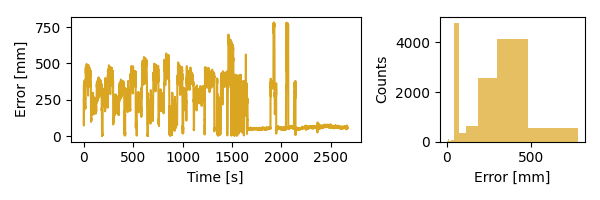

765.9496105397242 266.53372981004395


/home/norlab/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


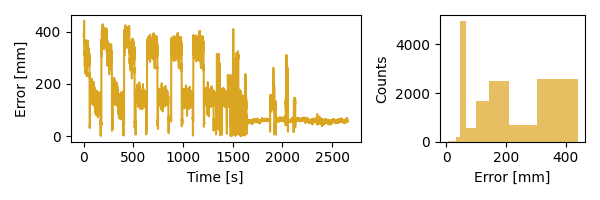

834.6878137116908 181.97870157342294


/home/norlab/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


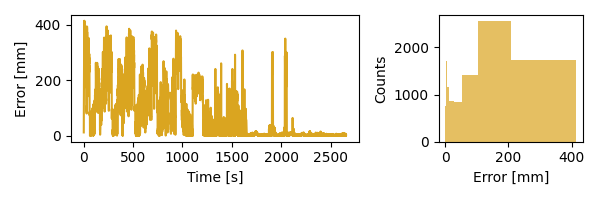

583.7517891426736 111.45787854486808


/home/norlab/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [23]:
# Plot inter-GPS distance 
%matplotlib notebook
import scripts.theodolite_plot_function as ptfu
ptfu = importlib.reload(ptfu)

save_fig = True
name_file = "./figs/distance_gps12.pdf"
ptfu.plot_gps_distance(time_gps_fb, distance_gps_fb, Dist_GPS_12, 20, save_fig, name_file)

save_fig = True
name_file = "./figs/distance_gps13.pdf"
ptfu.plot_gps_distance(time_gps_fm, distance_gps_fm, Dist_GPS_13, 20, save_fig, name_file)

save_fig = True
name_file = "./figs/distance_gps23.pdf"
ptfu.plot_gps_distance(time_gps_mb, distance_gps_mb, Dist_GPS_23, 20, save_fig, name_file)

<IPython.core.display.Javascript object>


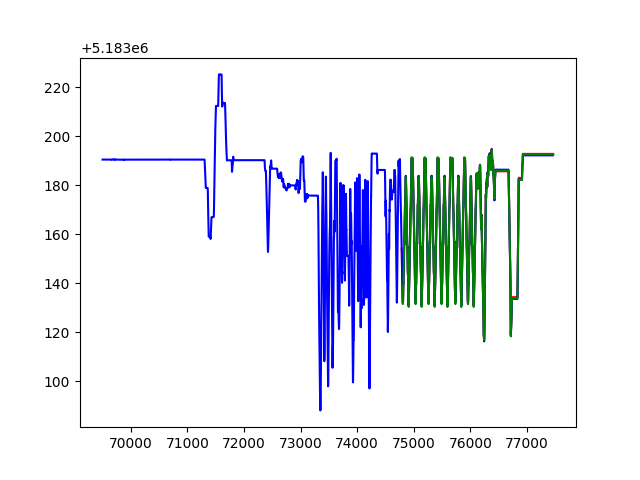

In [24]:
# Plot GPS trajectories
%matplotlib notebook
GPS_front_utm_data_array = np.array(GPS_front_utm_data)
GPS_back_utm_data_array = np.array(GPS_back_utm_data)
GPS_middle_utm_data_array = np.array(GPS_middle_utm_data)

plt.figure(1)
plt.plot(GPS_front_utm_data_array[:,0],GPS_front_utm_data_array[:,1], color='r')
plt.plot(GPS_back_utm_data_array[:,0],GPS_back_utm_data_array[:,1], color='b')
plt.plot(GPS_middle_utm_data_array[:,0],GPS_middle_utm_data_array[:,1], color='g')
plt.show()

In [ ]:
# Convert point data to csv file
ttfu = importlib.reload(ttfu)

# Trajectory total station (time, point data) x3
ttfu.Convert_data_to_csv(time_trimble_1, np.array(trimble_1).T, "./data/trimble1.csv")
ttfu.Convert_data_to_csv(time_trimble_2, np.array(trimble_2).T, "./data/trimble2.csv")
ttfu.Convert_data_to_csv(time_trimble_3, np.array(trimble_3).T, "./data/trimble3.csv")

# Trajectory GPS (time, point data) x3
ttfu.Convert_data_to_csv(GPS_front_utm_data_array[:,0], GPS_front_utm_data_array[:,1:4], "./data/gpsfront.csv")
ttfu.Convert_data_to_csv(GPS_back_utm_data_array[:,0], GPS_back_utm_data_array[:,1:4], "./data/gpsback.csv")
ttfu.Convert_data_to_csv(GPS_middle_utm_data_array[:,0], GPS_middle_utm_data_array[:,1:4], "./data/gpsmiddle.csv")